In [ ]:
import os
import pickle # save list as .pickle
import numpy as np
from tqdm import tqdm
import cv2 # read video file
from skimage.transform import resize # resizing images

In [ ]:
def Save2Npy(file_dir, save_dir):

    if not os.path.exists(save_dir): # If there is not save_dir folder, then create new folder at there.
        os.makedirs(save_dir)
    
    file_list=os.listdir(file_dir) # Make list of video file(in file_dir folder)'s name.
    
    for file in tqdm(file_list):
        frames=np.zeros((30, 160, 160, 3), dtype=np.float)
        i=0
        
        vid=cv2.VideoCapture(os.path.join(file_dir, file)) # Create cv2.VideoCapture() Object of each video file.
        
        if vid.isOpened():
            grabbed, frame=vid.read()
        else:
            grabbed=False
            
        frm=resize(frame, (160, 160, 3))
        frm=np.expand_dims(frm, axis=0)
        
        if(np.max(frm)>1):
            frm=frm/255.0
        frames[i][:]=frm
        i+=1
      
        while i<30:
            grabbed, frame=vid.read()
            if not grabbed:
                break
            # if type(frame) == type(None):
            #   break
            frm=resize(frame, (160, 160, 3))
            frm=np.expand_dims(frm, axis=0)


            if(np.max(frm)>1):
                frm=frm/255.0
            frames[i][:] = frm
            i+=1

        video_name=file.split('.')[0]
        video_path=os.path.join(file_dir, file)
        save_path=os.path.join(save_dir, video_name+'.npy')

        np.save(save_path, frames)

In [ ]:
file_dir='C:\\TF2_Object_Detection_API\\datasets\\violent'
save_dir='C:\\TF2_Object_Detection_API\\datasets\\AllVideo_Fight_Numpy'

Save2Npy(file_dir=file_dir, save_dir=save_dir)

  0%|                                                                              | 0/350 [00:00<?, ?it/s]C:\Users\user\AppData\Local\Temp/ipykernel_2928/2592651303.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  frames=np.zeros((30, 160, 160, 3), dtype=np.float)
100%|████████████████████████████████████████████████████████████████████| 350/350 [30:49<00:00,  5.28s/it]


In [ ]:
file_dir='C:\\TF2_Object_Detection_API\\datasets\\non_violent'
save_dir='C:\\TF2_Object_Detection_API\\datasets\\AllVideo_NonFight_Numpy'
Save2Npy(file_dir=file_dir, save_dir=save_dir)

  0%|                                                                              | 0/276 [00:00<?, ?it/s]C:\Users\user\AppData\Local\Temp/ipykernel_2928/2592651303.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  frames=np.zeros((30, 160, 160, 3), dtype=np.float)
100%|████████████████████████████████████████████████████████████████████| 276/276 [21:16<00:00,  4.62s/it]


In [ ]:
Fight_dir='C:\\TF2_Object_Detection_API\\datasets\\AllVideo_Fight_Numpy' # Folder that contains Fight(Violence) Video files
file_list_npy = os.listdir(Fight_dir) # File name list

import gc

data_Fight=[]
for file in file_list_npy:
    file_path=os.path.join(Fight_dir, file)
    x=np.load(file_path)
    data_Fight.append(x)
    gc.collect()

print(len(data_Fight))

350


In [ ]:
NonFight_dir='C:\\TF2_Object_Detection_API\\datasets\\AllVideo_NonFight_Numpy'
file_list_npy=os.listdir(NonFight_dir)

import gc

data_NonFight=[]
for file in file_list_npy:
    file_path=os.path.join(NonFight_dir, file)
    x=np.load(file_path)
    data_NonFight.append(x)
    gc.collect()

print(len(data_NonFight))

276


In [ ]:
with open("C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\01_data_Fight_211206.pickle","wb") as fw:
    pickle.dump(data_Fight, fw, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open("C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\01_data_NonFight_211206.pickle","wb") as fw:
    pickle.dump(data_NonFight, fw, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
label_Fight_per_video=np.array([0,1])
label_Fight=[label_Fight_per_video]*len(data_Fight) # As amount as count of Violence(Fight) Video

label_NonFight_per_video=np.array([1,0])
label_NonFight=[label_NonFight_per_video]*len(data_NonFight) # As amount as count of Non-Violence(NonFight) Video

In [ ]:
len(label_Fight), len(label_NonFight)

(350, 276)

In [ ]:
label_Fight[0], label_NonFight[0]

(array([0, 1]), array([1, 0]))

In [ ]:
with open("C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\01_label_Fight_211206.pickle","wb") as fw:
    pickle.dump(label_Fight, fw)

In [ ]:
with open("C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\01_label_NonFight_211206.pickle","wb") as fw:
    pickle.dump(label_NonFight, fw)

# 02.Making Train set & Test set

In [ ]:
# imports
from random import shuffle

In [ ]:
# Fight Video frames Numpy array list : /content/drive/MyDrive/Team2/Violence_detection/1109_projectRVD/datasets/AllVideo_numpy_list_pickle/01_data_Fight_211109.pickle
with open("C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\01_data_Fight_211206.pickle","rb") as fr:
    data_Fight=pickle.load(fr)
print(len(data_Fight))

350


In [ ]:
# NonFight Video frames Numpy array list : /content/drive/MyDrive/Team2/Violence_detection/1109_projectRVD/datasets/AllVideo_numpy_list_pickle/01_data_NonFight_211109.pickle
with open("C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\01_label_Fight_211206.pickle","rb") as fr:
    label_Fight=pickle.load(fr)
print(len(label_Fight))

350


In [ ]:
# Fight label Numpy array list :/content/drive/MyDrive/Team2/Violence_detection/1109_projectRVD/datasets/AllVideo_numpy_list_pickle/01_label_Fight_211109.pickle
with open("C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\01_data_NonFight_211206.pickle","rb") as fr:
    data_NonFight=pickle.load(fr)
print(len(data_NonFight))

276


In [ ]:
# NonFight label Numpy array list : /content/drive/MyDrive/Team2/Violence_detection/1109_projectRVD/datasets/AllVideo_numpy_list_pickle/01_label_NonFight_211109.pickle
with open("C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\01_label_NonFight_211206.pickle","rb") as fr:
    label_NonFight=pickle.load(fr)
print(len(label_NonFight))

276


In [ ]:
data_total=data_Fight+data_NonFight
print(len(data_total))

label_total=label_Fight+label_NonFight
print(len(label_total))

np.random.seed(42)
c=list(zip(data_total, label_total)) # zip 
shuffle(c) # Random Shuffle
data_total, label_total=zip(*c) # unpackin

626
626


In [ ]:
# Save data
with open("C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\02_data_total_211206.pickle","wb") as fw:
    pickle.dump(data_total, fw, protocol=pickle.HIGHEST_PROTOCOL)

# Save label
with open("C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\02_label_total_211206.pickle","wb") as fw:
    pickle.dump(label_total, fw)

In [ ]:
# load data
with open("C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\02_data_total_211206.pickle","rb") as fr:
    data_total=pickle.load(fr)

# load label
with open("C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\02_label_total_211206.pickle","rb") as fr:
    label_total=pickle.load(fr)

In [ ]:
training_set=int(len(data_total)*0.8)
test_set=int(len(data_total)*0.2)

data_training=data_total[0:training_set] # Training set data
data_test=data_total[training_set:] # Test set data

label_training=label_total[0:training_set] # Training set label
label_test=label_total[training_set:] # Test set label

len(data_training), len(label_training), len(data_test), len(label_test)

(500, 500, 126, 126)

In [ ]:
# check the shape of elements
data_training[0].shape, label_training[0].shape

((30, 160, 160, 3), (2,))

In [ ]:
data_training[0][0, :, :, 0]

array([[0.        , 0.18823529, 0.63137255, ..., 0.74803922, 0.10637255,
        0.        ],
       [0.        , 0.18431373, 0.625     , ..., 0.67941176, 0.07254902,
        0.        ],
       [0.        , 0.18284314, 0.61568627, ..., 0.52009804, 0.04803922,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.17058824, 0.01666667,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.19460784, 0.04656863,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.20147059, 0.0627451 ,
        0.        ]])

In [ ]:
# training set, data
with open("C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\02_data_training_211206.pickle","wb") as fw:
    pickle.dump(data_training, fw, protocol=pickle.HIGHEST_PROTOCOL)

# training set, label
with open("C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\02_label_training_211206.pickle","wb") as fw:
    pickle.dump(label_training, fw)

# test set, data
with open("C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\02_data_test_211206.pickle","wb") as fw:
    pickle.dump(data_test, fw, protocol=pickle.HIGHEST_PROTOCOL)

# test set, label
with open("C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\02_label_test_211206.pickle","wb") as fw:
    pickle.dump(label_test, fw)

In [ ]:
import gc
gc.collect()

0

In [ ]:
# Training set : data, label

with open("C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\02_data_training_211206.pickle","rb") as fr:
    data_training=pickle.load(fr)

with open("C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\02_label_training_211206.pickle","rb") as fr:
    label_training=pickle.load(fr)

# Test set : data, label

with open("C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\02_data_test_211206.pickle","rb") as fr:
    data_test=pickle.load(fr)

with open("C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\02_label_test_211206.pickle","rb") as fr:
    label_test=pickle.load(fr)

In [ ]:
import gc
gc.collect()

0

In [ ]:
# Training set

data_training_ar=np.array(data_training, dtype=np.float16) #> (20, 30, 160, 160, 3)
np.save('C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\02_data_training_Numpy_211206.npy', data_training_ar)
gc.collect()

label_training_ar=np.array(label_training) #> (20, 2)
np.save('C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\02_label_training_Numpy_211206.npy', label_training_ar)
gc.collect()

data_training_ar.shape, label_training_ar.shape

((500, 30, 160, 160, 3), (500, 2))

In [ ]:
# Test set

data_test_ar=np.array(data_test, dtype=np.float16) #> (6, 30, 160, 160, 3)

np.save('C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\02_data_test_Numpy_211206.npy', data_test_ar)

label_test_ar=np.array(label_test) #> (6, 2)

np.save('C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\02_label_test_Numpy_211206.npy', label_test_ar)

data_test_ar.shape, label_test_ar.shape

((126, 30, 160, 160, 3), (126, 2))

# 03. Extract features from dataset by using MobileNet

In [ ]:
# imports
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
import random

In [ ]:
data_training_ar=np.load('C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\02_data_training_Numpy_211206.npy') 
data_training_ar.shape #> (20, 30, 160, 160, 3)

(500, 30, 160, 160, 3)

In [ ]:
data_test_ar=np.load('C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\02_data_test_Numpy_211206.npy') 
data_test_ar.shape #> (6, 30, 160, 160, 3)

(126, 30, 160, 160, 3)

In [ ]:
data_training_ar=data_training_ar.reshape(data_training_ar.shape[0]*30, 160, 160, 3) 
data_training_ar.shape #> (600, 160, 160, 3)

(15000, 160, 160, 3)

In [ ]:
data_test_ar=data_test_ar.reshape(data_test_ar.shape[0]*30, 160, 160, 3) 
data_test_ar.shape #> (180, 160, 160, 3)

(3780, 160, 160, 3)

In [ ]:
data_training_ar=data_training_ar.reshape(data_training_ar.shape[0]*30, 160, 160, 3) 
data_training_ar.shape                           #> (7200, 160, 160, 3)

data_test_ar=data_test_ar.reshape(data_test_ar.shape[0]*30, 160, 160, 3) 
data_test_ar.shape                               #> (1800, 160, 160, 3)

X_train=base_model.predict(data_training_ar)
print(X_train.shape)                             #> (7200, 160, 160, 3)

X_test=base_model.predict(data_test_ar)
print(X_test.shape)                              #> (1800, 160, 160, 3)

ValueError: cannot reshape array of size 1152000000 into shape (450000,160,160,3)

In [ ]:
base_model=keras.applications.mobilenet.MobileNet(input_shape=(160, 160, 3),
                                                  include_top=False,
                                                  weights='imagenet', classes=2)

In [ ]:
base_model.summary() #> (None, 5, 5, 1024)

Model: "mobilenet_1.00_160"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 80, 80, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 80, 80, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 80, 80, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 80, 80, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 80, 80, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 80, 80, 32) 

In [ ]:
np.random.seed(42)

X_train=base_model.predict(data_training_ar)
print(X_train.shape)                             #> (600, 5, 5, 1024)

X_test=base_model.predict(data_test_ar)
print(X_test.shape)                               #> (180, 5, 5, 1024)

(15000, 5, 5, 1024)
(3780, 5, 5, 1024)


In [ ]:
X_train_reshaped = X_train.reshape(int(X_train.shape[0]/30), 30, 5*5*1024) #> (20, 30, 25600) ndarray
X_test_reshaped = X_test.reshape(int(X_test.shape[0]/30), 30, 5*5*1024) #> (6, 30, 25600) ndarray

X_train_reshaped.shape, X_test_reshaped.shape

((500, 30, 25600), (126, 30, 25600))

In [ ]:
np.save('C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\MobileNet_x_train_reshaped_211206.npy', X_train_reshaped)
np.save('C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\MobileNet_x_test_reshaped_211206.npy', X_test_reshaped)

# 04. Train LSTM Model

In [ ]:
# imports
import numpy as np 
import os 
import tensorflow as tf
from tensorflow import keras 
import time 
import matplotlib.pyplot as plt

In [ ]:
X_train_reshaped=np.load('C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\MobileNet_x_train_reshaped_211206.npy')

X_test_reshaped=np.load('C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\MobileNet_x_test_reshaped_211206.npy')

y_train=np.load('C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\02_label_training_Numpy_211206.npy')

y_test=np.load('C:\\TF2_Object_Detection_API\\datasets\\AllVideo_numpy_list_pickle\\02_label_test_Numpy_211206.npy')

In [ ]:
X_train_reshaped.shape, X_test_reshaped.shape #> (# of video file, # of frame img, 25600)

((500, 30, 25600), (126, 30, 25600))

In [ ]:
y_train.shape, y_test.shape #> (# of video file, # of class)

((500, 2), (126, 2))

In [ ]:
y_train[10:30]

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1]])

In [ ]:
chunk_size=25600
n_chunks=30

model=keras.models.Sequential()
model.add(keras.layers.LSTM(512, input_shape=(n_chunks, chunk_size))) # (30, 25600)
model.add(keras.layers.Dense(1024))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(256))
model.add(keras.layers.Activation('sigmoid'))
model.add(keras.layers.Dense(2))
model.add(keras.layers.Activation('softmax'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 512)               53479424  
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [ ]:
checkpoint_cb=keras.callbacks.ModelCheckpoint('C:\\TF2_Object_Detection_API\\datasets\\211206_MobileNet_checkpoint_epoch50.h5', save_best_only=True)

In [ ]:
np.random.seed(42)

epoch=50
batchS=500
history=model.fit(x=X_train_reshaped[0:2100], y=y_train[0:2100],
                  epochs=epoch,
                  validation_data=(X_train_reshaped[2100:], y_train[2100:]),
                  callbacks=[checkpoint_cb],
                  batch_size=batchS, verbose=2)

Epoch 1/50
1/1 - 15s - loss: 0.2616 - accuracy: 0.5600
Epoch 2/50
1/1 - 1s - loss: 0.4398 - accuracy: 0.4400
Epoch 3/50
1/1 - 1s - loss: 0.2415 - accuracy: 0.5700
Epoch 4/50
1/1 - 1s - loss: 0.2257 - accuracy: 0.5800
Epoch 5/50
1/1 - 1s - loss: 0.2172 - accuracy: 0.6320
Epoch 6/50
1/1 - 1s - loss: 0.1902 - accuracy: 0.7660
Epoch 7/50
1/1 - 1s - loss: 0.1628 - accuracy: 0.8060
Epoch 8/50
1/1 - 1s - loss: 0.1348 - accuracy: 0.9160
Epoch 9/50
1/1 - 1s - loss: 0.1012 - accuracy: 0.9380
Epoch 10/50
1/1 - 1s - loss: 0.0697 - accuracy: 0.9540
Epoch 11/50
1/1 - 1s - loss: 0.0446 - accuracy: 0.9720
Epoch 12/50
1/1 - 1s - loss: 0.0276 - accuracy: 0.9820
Epoch 13/50
1/1 - 1s - loss: 0.0155 - accuracy: 0.9920
Epoch 14/50
1/1 - 1s - loss: 0.0095 - accuracy: 0.9940
Epoch 15/50
1/1 - 1s - loss: 0.0060 - accuracy: 1.0000
Epoch 16/50
1/1 - 2s - loss: 0.0042 - accuracy: 0.9980
Epoch 17/50
1/1 - 1s - loss: 0.0032 - accuracy: 0.9980
Epoch 18/50
1/1 - 2s - loss: 0.0025 - accuracy: 1.0000
Epoch 19/50
1/1 - 

In [ ]:
# evaluate LSTM Model by using test set
result=model.evaluate(X_test_reshaped, y_test)

4/4 [==============================] - 1s 63ms/step - loss: 0.2300 - accuracy: 0.7460


In [ ]:
# accuracy and loss of trained LSTM Model
for name, value in zip(model.metrics_names, result):
    print(name, value)

loss 0.23004958033561707
accuracy 0.7460317611694336


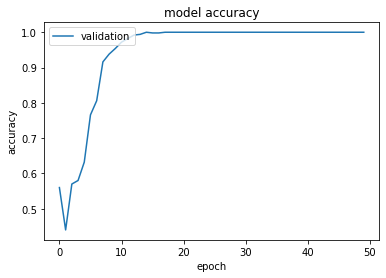

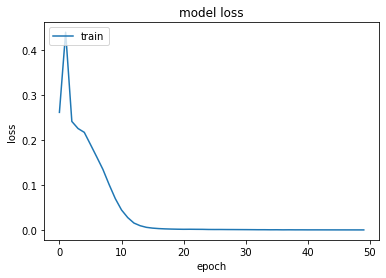

In [ ]:
# draw plot of Accuracy and loss

plt.plot(history.history['accuracy']) # Draw Accuracy plot
# plt.plot(history.history['val_accuracy']) : 없는듯...왜? 학습을 잘못했나?? >> cuda, cudnn version 문제
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['validation'], loc='upper left')
plt.savefig('C:\\TF2_Object_Detection_API\\datasets\\211206_MobileNet_model_accuracy_epoch50.jpg') #save .jpg img of Accuracy plot
plt.show()

plt.plot(history.history['loss']) # Draw Loss plot
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('C:\\TF2_Object_Detection_API\\datasets\\211206_MobileNet_model_loss_epoch50.jpg') #save .jpg img of Loss plot
plt.show()

In [ ]:
model.save('C:\\TF2_Object_Detection_API\\datasets\\211206_MobileNet_model_epoch50.h5', include_optimizer=True)

# Actual Use : Violence detection for .mp4 video file

In [ ]:
# imports

import cv2 # openCV 4.5.1
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
import time 

from skimage.io import imread
from skimage.transform import resize 
from PIL import Image, ImageFont, ImageDraw # add caption by using custom font

from collections import deque

In [ ]:
# base_model : MobileNet
base_model=keras.applications.mobilenet.MobileNet(input_shape=(160, 160, 3),
                                                  include_top=False,
                                                  weights='imagenet', classes=2)

In [ ]:
# model : trained LSTM model
model=keras.models.load_model('C:\\TF2_Object_Detection_API\\datasets\\211206_MobileNet_model_epoch50.h5')

In [ ]:
# video_reader()
# load video file >> Scaling, resizing >> Transform to nparray >> return nparray
def video_reader(cv2, filename):
    """Load 1 video file. Next, read each frame image and resize as (fps, 160, 160, 3) shape and return frame Numpy array."""
    
    frames=np.zeros((30, 160, 160, 3), dtype=np.float) #> (fps, img size, img size, RGB)
    
    i=0
    print(frames.shape)
    vid=cv2.VideoCapture(filename) # read frame img from video file.
    
    if vid.isOpened():
        grabbed, frame=vid.read() 
    else:
        grabbed=False
    
    frm=resize(frame,(160, 160, 3))
    frm=np.expand_dims(frm, axis=0)
    
    if(np.max(frm)>1):
        frm=frm/255.0 # Scaling
    frames[i][:]=frm
    i+=1
    print('Reading Video')
    
    while i<30:
        grabbed, frame=vid.read()
        frm=resize(frame, (160, 160, 3)) 
        frm=np.expand_dims(frm, axis=0)
        if(np.max(frm)>1):
            frm=frm/255.0
        frames[i][:]=frm
        i+=1
        
    return frames

In [ ]:
# create_pred_imgarr()
# Extract features of each frame img by using base_model(MobileNet)
# Reshape features Numpy array to insert LSTM model
def create_pred_imgarr(base_model, video_frm_ar):
    """Insert base_model(MobileNet) and result of video_reader() function.
    This function extract features from each frame img by using base_model.
    And reshape Numpy array to insert LSTM model : (1, 30, 25600)"""
    video_frm_ar_dim=np.zeros((1, 30, 160, 160, 3), dtype=np.float)
    video_frm_ar_dim[0][:][:]=video_frm_ar #> (1, 30, 160, 160, 3)
     
    # Extract features from each frame img by using base_model(MobileNet)
    pred_imgarr=base_model.predict(video_frm_ar)
    # Reshape features array : (1, fps, 25600)
    pred_imgarr=pred_imgarr.reshape(1, pred_imgarr.shape[0], 5*5*1024)
    
    return pred_imgarr #> ex : (1, 30, 25600)

In [ ]:
# pred_fight()
# Distinguish Violence(Fight) / Non-Violence(NonFight)
# Insert reshaped-features-array to trained LSTM model

def pred_fight(model, pred_imgarr, acuracy=0.9):
    """If accuracy>=input value(ex:0.9), return (Violence)'True'. else, return 'False'.
    ::model:: trained LSTM model (We already load .h5 file in the above.)
    ::pred_imgarr:: (1, 30, 25600) shaped Numpy array. Extracted features.
    ::accuracy:: default value is 0.9"""

    pred_test=model.predict(pred_imgarr) #> Violence(Fight) : [0,1]. Non-Violence(NonFight) : [1,0]
    
    if pred_test[0][1] >= acuracy:
        return True, pred_test[0][1] #> True, Probability of Violence
    
    else:
        return False, pred_test[0][1] #> False, Probability of Violence

In [ ]:
# check above functions doing well

# 1. load any video file
# video_file='/content/drive/MyDrive/Team2/Violence_detection/1105_jenil123/fight-detection-surv-dataset/fight/fi001.mp4'
# (True, 0.9986896)
# video_file = '/content/drive/MyDrive/Team2/Violence_detection/1105_jenil123/fight-detection-surv-dataset/noFight/nofi006.mp4'
# (False, 0.00013885867)
# video_file = '/content/drive/MyDrive/Team2/Violence_detection/1105_Sapir52/dataset_vedio/fi225_xvid.avi'
# (False, 0.057196457) >> fight인데 nonfight...
video_file = 'C:\\Users\\user\\Downloads\\raw\\test\\violent\\v2.mp4'
# (False, 0.0019765943)
# 2. check function's operation
video_frm_ar=video_reader(cv2, video_file) # (30, 160, 160, 3)
                                           # Reading Video

pred_imgarr=create_pred_imgarr(base_model, video_frm_ar)
pred_imgarr.shape  # (1, 30, 25600)

preds=pred_fight(model, pred_imgarr, 0.9)
preds #> (Violence True or False, Probability of Violence)

C:\Users\user\AppData\Local\Temp/ipykernel_2928/2150661114.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  frames=np.zeros((30, 160, 160, 3), dtype=np.float) #> (fps, img size, img size, RGB)


(30, 160, 160, 3)
Reading Video


C:\Users\user\AppData\Local\Temp/ipykernel_2928/1547568784.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  video_frm_ar_dim=np.zeros((1, 30, 160, 160, 3), dtype=np.float)


(True, 0.9997762)

In [ ]:
# define detect_violence()

def detect_violence(video):
    """ It contains video_reader(), create_pred_imgarr(), pred_fight() function as all-in-one.
    ::video:: video file (.mp4, .avi, ...)
    
    video_reader() : Read each frame img by using openCV. Resize Numpy array
    create_pred_imgarr() : Extract features from frame img array by using base model(MobileNet)
    pred_fight() : Decide Violence True or False by using trained LSTM model"""
    
    video_frm_ar=video_reader(cv2, video) 
    pred_imgarr=create_pred_imgarr(base_model, video_frm_ar)
    
    time1=int(round(time.time()*1000))

    f, precent=pred_fight(model, pred_imgarr, acuracy=0.65)
    
    time2=int(round(time.time()*1000))
    
    result={'Violence': f, #> True(Violence), False(Non-Violence)
            'Violence Estimation': str(precent), # Probability of Violence
            'Processing Time' : str(time2-time1)} 
    
    return result

In [ ]:
# test function : detect_violence()

# video_file='C:\\Users\\user\\Downloads\WeCare\\output05.mp4'
'''{'Violence': True, 'Violence Estimation': '0.9997708', 'Processing Time': '94'}'''
# video_file='C:\\Users\\user\\Downloads\\raw\\test\\non_violent\\u10.mp4'
'''{'Violence': False, 'Violence Estimation': '9.745419e-05', 'Processing Time': '78'}'''
# video_file='C:\\Users\\user\\Downloads\\WeCare\\output04.mp4'
'''{'Violence': False, 'Violence Estimation': '0.10261435', 'Processing Time': '94'}'''
video_file='C:\\Users\\user\\Downloads\\WeCare\\output09.mp4'
'''{'Violence': True, 'Violence Estimation': '0.9306362', 'Processing Time': '65'}'''
detect_violence(video_file)

C:\Users\user\AppData\Local\Temp/ipykernel_2928/2150661114.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  frames=np.zeros((30, 160, 160, 3), dtype=np.float) #> (fps, img size, img size, RGB)


(30, 160, 160, 3)
Reading Video


C:\Users\user\AppData\Local\Temp/ipykernel_2928/1547568784.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  video_frm_ar_dim=np.zeros((1, 30, 160, 160, 3), dtype=np.float)


{'Violence': True, 'Violence Estimation': '0.9306362', 'Processing Time': '65'}

In [ ]:
import time

video_name = time.strftime('%Y%m%d|%H%M%S')
output_path='./' + video_name + '.mp4'
print(output_path)

./20211206|123928.mp4
